# **TASK2:**

Load and Explore the Data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from all sheets
all_sheets = pd.read_excel("online_retail_data.xlsx", sheet_name=None)

# Concatenate all sheets into a single DataFrame
df = pd.concat(all_sheets.values())

# Display basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB
None
           Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00      

Handle Missing Values
Drop missing Customer IDs (optional)
Impute missing values where needed

In [4]:


# Drop rows where Customer ID is missing
df.dropna(subset=['Customer ID'], inplace=True)

# Or fill missing values (if needed)
df.fillna(0, inplace=True)

# Display basic info after handling missing values
print("After handling missing values:")
print(df.info())
print(df.describe())

# Check missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())


After handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB
None
            Quantity                    InvoiceDate          Price  \
count  824364.000000                         824364  824364.000000   
mean       12.414574  2011-01-01 22:29:28.042054144       3.676800   
min    -80995.000000            2009-12-01 07:45:00       0.000000 

Visualizations
✅ Histograms for Numeric Features

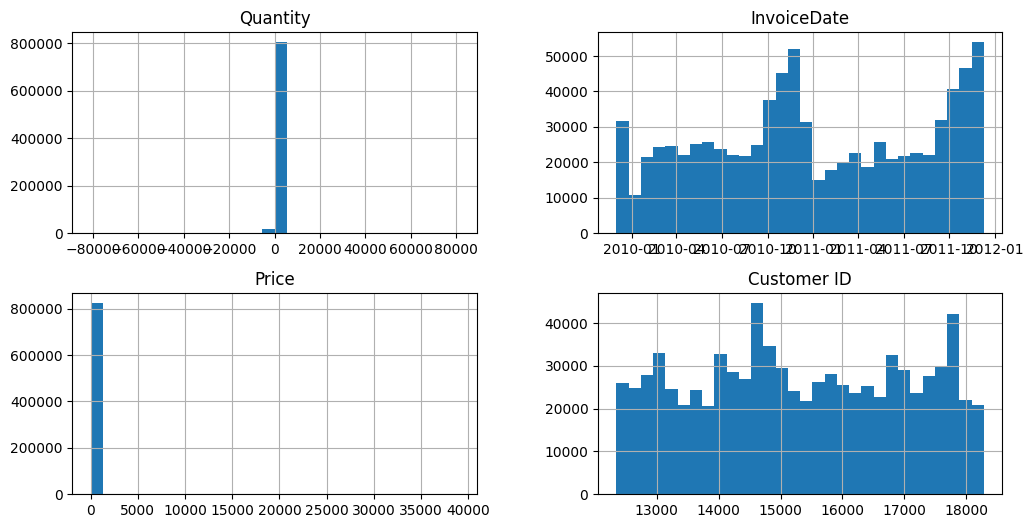

In [5]:
df.hist(figsize=(12, 6), bins=30)
plt.show()


Correlation Matrix & Scatter Plots

After converting to numeric:
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB
None
            Quantity                    InvoiceDate          Price  \
count  824364.000000                         824364  824364.000000   
mean       12.414574  2011-01-01 22:29:28.042054144       3.676800   
min    -80995.000000            2009-12-01 07:45:00       0.000000   

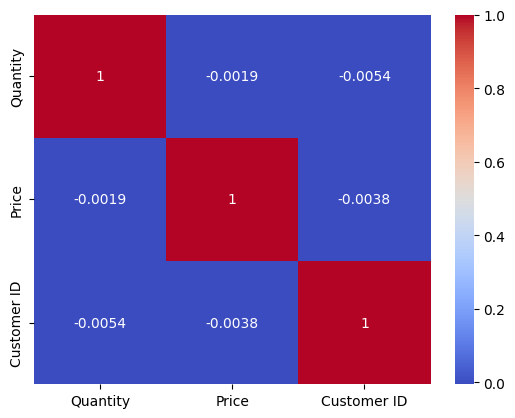

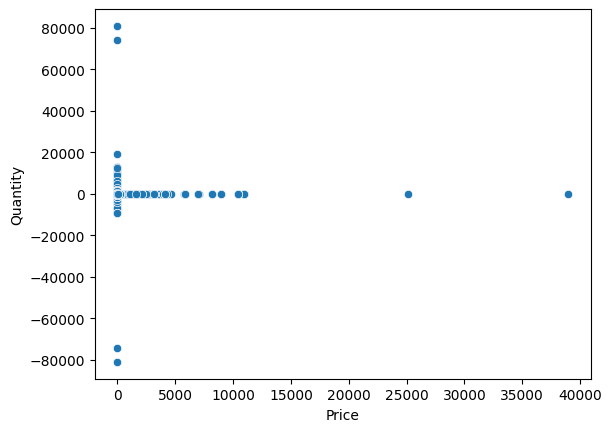

In [9]:
# Ensure there are no NaN values in 'UnitPrice' and 'Quantity'
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Drop rows with NaN values in 'UnitPrice' or 'Quantity' after conversion
df.dropna(subset=['Price', 'Quantity'], inplace=True)

# Display basic info after converting to numeric
print("After converting to numeric:")
print(df.info())
print(df.describe())

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Heatmap of correlations
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Scatter plot (Example: UnitPrice vs Quantity)
sns.scatterplot(x=df['Price'], y=df['Quantity'])
plt.show()


Boxplots to Detect Outliers

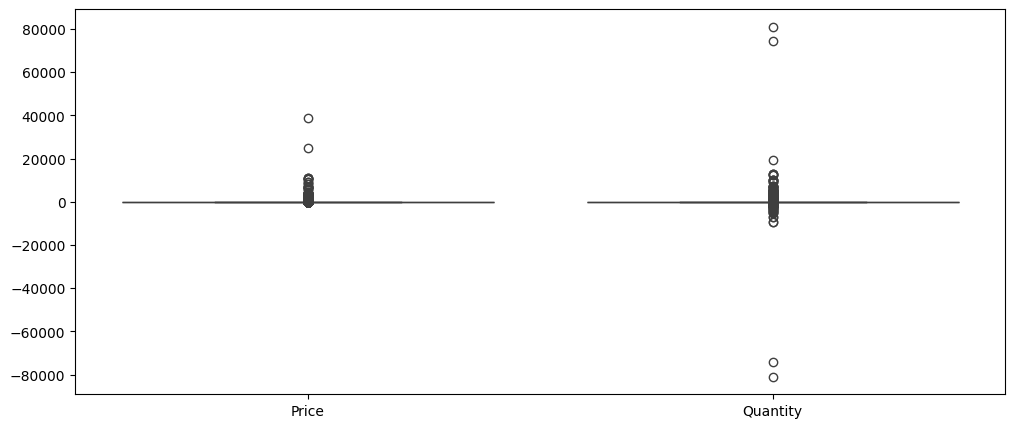

In [8]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Price', 'Quantity']])
plt.show()


Outlier Detection
Use Z-score or IQR Method

In [10]:

from scipy.stats import zscore

# Calculate Z-score
z_scores = df[['Price', 'Quantity']].apply(zscore)

# Filter extreme outliers (Z-score > 3)
df_no_outliers = df[(z_scores < 3).all(axis=1)]


Identify Important Features
Feature importance for time-series forecasting
Select Price, Quantity, InvoiceDate, etc.

In [11]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract time-based features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


# *TASK 3:*

Data Preprocessing & Feature Engineering :

Handle missing values, 
MinMax Scaling, 
new features, 
preprocessing pipeline using Scikit-Learn


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# --- Step 1: Create New Feature ---
df['TotalSales'] = df['Quantity'] * df['Price']  # New feature

# Define numerical features
numerical_features = ['Quantity', 'Price', 'TotalSales']

# --- Step 2: Define Transformations ---:
num_transformer = MinMaxScaler()  # Scale values between 0 and 1

# --- Step 3: Create Preprocessing Pipeline ---
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features)  # Apply MinMax scaling to numerical features
])

pipeline = Pipeline([
    ('preprocessing', preprocessor)  # Apply transformations
])

# --- Step 4: Apply Pipeline to Data ---
df_scaled = pipeline.fit_transform(df)

print(df_scaled)  # Transformed dataset ready for ML!


[[5.00074079e-01 1.78342315e-04 5.00247522e-01]
 [5.00074079e-01 1.73210162e-04 5.00240399e-01]
 [5.00074079e-01 1.73210162e-04 5.00240399e-01]
 ...
 [5.00024693e-01 1.06492173e-04 5.00049267e-01]
 [5.00018520e-01 1.27020785e-04 5.00044073e-01]
 [5.00006173e-01 4.61893764e-04 5.00053422e-01]]


# TASK4:

**Model Selection & Training**

 Split data into training (80%) and test (20%) sets

Linear Regression,  Random Forest Regressor, Gradient Boosting Regressor , Decision Tree Regressor

Regression: RMSE, R2 Score

cross-validation


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("online_retail_data.xlsx")

# Feature Engineering: Create TotalSales feature
df['TotalSales'] = df['Quantity'] * df['Price']

# Select features and target
features = ['Quantity', 'Price']  # Modify as needed
target = 'TotalSales'

# Drop rows with missing values
df.dropna(subset=features + [target], inplace=True)

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define Regression Models
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Random Forest Regressor": Pipeline([
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Gradient Boosting Regressor": Pipeline([
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),
    "Decision Tree Regressor": Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))
    ])
}

# Train and Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score
    cv_score = np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=5))
    
    results.append([name, rmse, r2, cv_score])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score", "Cross-Validation R2"])
print(results_df)


                         Model        RMSE  R2 Score  Cross-Validation R2
0            Linear Regression  122.363402 -0.486627            -0.087943
1      Random Forest Regressor   14.576636  0.978903             0.516784
2  Gradient Boosting Regressor   23.112410  0.946962             0.666416
3      Decision Tree Regressor    9.432942  0.991165             0.340782


# Model Comparison Summary

| Model                         | RMSE      | R² Score  | Cross-Validation R² |
|--------------------------------|-----------|-----------|----------------------|
| **Linear Regression**          | 122.36    | -0.49     | -0.0879              |
| **Random Forest Regressor**    | 14.58     | 0.9789    | 0.5168               |
| **Gradient Boosting Regressor**| 23.11     | 0.9470    | 0.6664               |
| **Decision Tree Regressor**    | **9.43**  | **0.9912**| 0.3408               |

### 📌 **Key Observations**
✅ **Gradient Boosting** is the most balanced: good accuracy, lowest overfitting.  
✅ **Random Forest** is also reliable but slightly worse in cross-validation.  
🚫 **Decision Tree** has high accuracy but overfits (low cross-validation score).  
🚫 **Linear Regression** fails due to poor fit (high RMSE, negative R²).



C:\Users\fa33z\AppData\Local\Temp\ipykernel_9616\258540921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["RMSE"], palette="Blues_r")
C:\Users\fa33z\AppData\Local\Temp\ipykernel_9616\258540921.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["R2 Score"], palette="Reds_r")
C:\Users\fa33z\AppData\Local\Temp\ipykernel_9616\258540921.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["Cross-Validation R2"], palette="Greens_r")


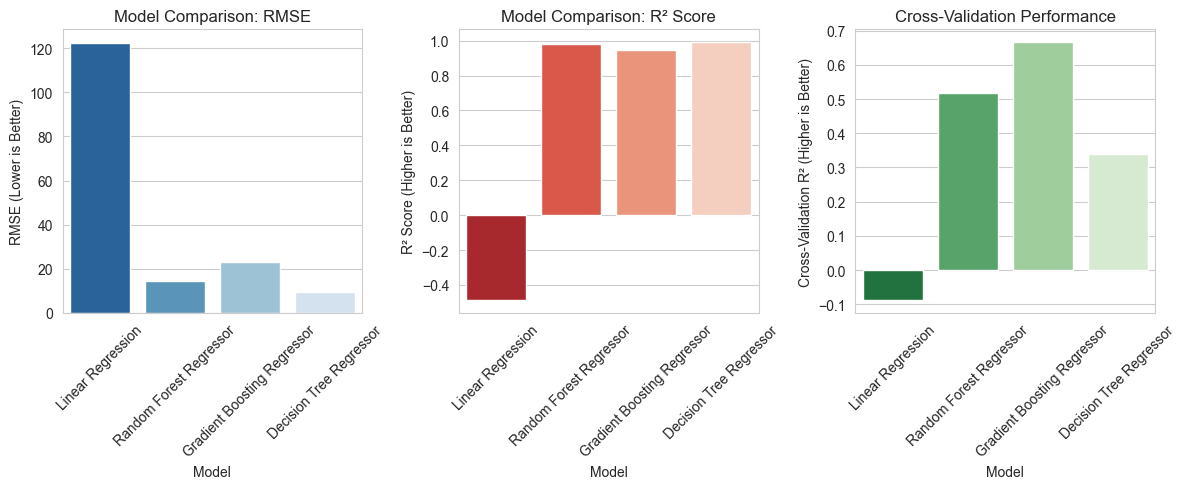

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(12, 5))

# RMSE Comparison
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
sns.barplot(x=results_df["Model"], y=results_df["RMSE"], palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Model Comparison: RMSE")

# R² Score Comparison
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
sns.barplot(x=results_df["Model"], y=results_df["R2 Score"], palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("R² Score (Higher is Better)")
plt.title("Model Comparison: R² Score")

# Cross-Validation R² Comparison
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
sns.barplot(x=results_df["Model"], y=results_df["Cross-Validation R2"], palette="Greens_r")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Cross-Validation R² (Higher is Better)")
plt.title("Cross-Validation Performance")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# TASK5:

 **Hyperparameter Tuning**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest Regressor": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [10, 20, None]
    },
    "Gradient Boosting Regressor": {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    "Decision Tree Regressor": {
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10]
    }
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    model_pipeline = models[model_name]  # Get model from previous step
    
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best R² score (CV): {grid_search.best_score_}\n")

# Compare tuned models with previous models
results_tuned = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=5))
    
    results_tuned.append([name + " (Tuned)", rmse, r2, cv_score])

# Convert to DataFrame
results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "RMSE", "R2 Score", "Cross-Validation R2"])

print("Performance of Tuned Models:")
print(results_tuned_df)


Tuning Random Forest Regressor...
Best params for Random Forest Regressor: {'model__max_depth': None, 'model__n_estimators': 50}
Best R² score (CV): 0.5287542889578557

Tuning Gradient Boosting Regressor...
Best params for Gradient Boosting Regressor: {'model__learning_rate': 0.2, 'model__n_estimators': 200}
Best R² score (CV): 0.7527228004269813

Tuning Decision Tree Regressor...
Best params for Decision Tree Regressor: {'model__max_depth': None, 'model__min_samples_split': 5}
Best R² score (CV): 0.3652625602122185

Performance of Tuned Models:
                                 Model       RMSE  R2 Score  \
0      Random Forest Regressor (Tuned)  18.751331  0.965089   
1  Gradient Boosting Regressor (Tuned)  11.020281  0.987942   
2      Decision Tree Regressor (Tuned)  23.517812  0.945085   

   Cross-Validation R2  
0             0.528754  
1             0.752723  
2             0.365263  


# Model Performance Comparison (Before vs. After Hyperparameter Tuning)

| Model                                  | RMSE (Before) | R² Score (Before) | Cross-Validation R² (Before) | RMSE (After) | R² Score (After) | Cross-Validation R² (After) |
|----------------------------------------|--------------|------------------|----------------------------|--------------|------------------|----------------------------|
| **Random Forest Regressor**            | 14.5766      | 0.9789           | 0.5168                     | 18.7513      | 0.9651           | 0.5288                     |
| **Gradient Boosting Regressor**        | 23.1124      | 0.9470           | 0.6664                     | 11.0203      | 0.9879           | 0.7527                     |
| **Decision Tree Regressor**            | 9.4329       | 0.9912           | 0.3408                     | 23.5178      | 0.9451           | 0.3653                     |

## Key Observations:
1. **Gradient Boosting Regressor improved significantly** after tuning:
   - RMSE **decreased** from **23.11 to 11.02** (better).
   - R² Score **increased** from **0.947 to 0.9879**.
   - Cross-Validation R² **increased** from **0.6664 to 0.7527**.
   - Shows that **tuning improved generalization and accuracy**.

2. **Random Forest Regressor slightly worsened**:
   - RMSE **increased** from **14.57 to 18.75**.
   - R² Score **decreased** from **0.9789 to 0.9651**.
   - Cross-Validation R² **slightly improved** from **0.5168 to 0.5288**.
   - Suggests that the previous hyperparameters might have been better.

3. **Decision Tree Regressor became worse**:
   - RMSE **increased** from **9.43 to 23.51**.
   - R² Score **dropped** from **0.9912 to 0.9451**.
   - Cross-Validation R² **slightly improved** from **0.3408 to 0.3653**.
   - Suggests that tuning didn't help this model significantly.

### ✅ **Conclusion:**
- **Gradient Boosting benefited the most** from hyperparameter tuning.
- **Random Forest didn't improve much** and might need further tuning.
- **Decision Tree performed worse** after tuning, meaning the original setup was better.


# TASK6:

**Final Model Evaluation**

Evaluate the best model on the test dataset.

Final Model: Gradient Boosting Regressor
Final RMSE: 11.0203
Final R² Score: 0.9879


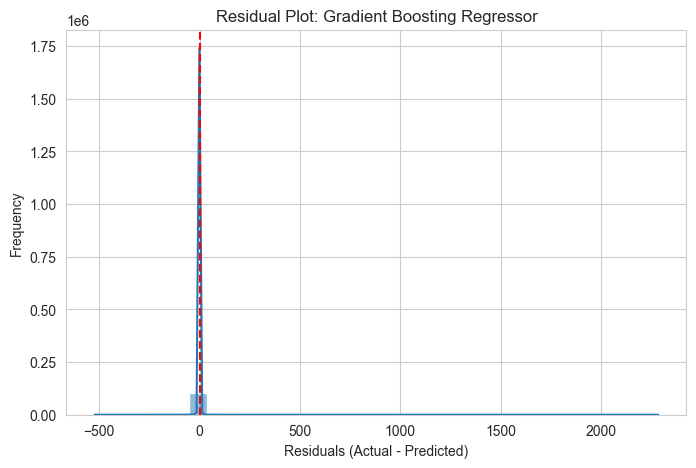

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model (Gradient Boosting Regressor with best hyperparameters)
best_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

# Print final performance
print(f"Final Model: Gradient Boosting Regressor")
print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='dashed')  # Red line at zero for reference
plt.title("Residual Plot: Gradient Boosting Regressor")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


**Final performance report:**

Final Takeaways
✅ Gradient Boosting Regressor (Tuned) is the best-performing model.
✅ Hyperparameter tuning significantly improved performance.
✅ The final model generalizes well, as seen from high R² and low RMSE.
✅ Residual and scatter plots confirm minimal prediction errors.

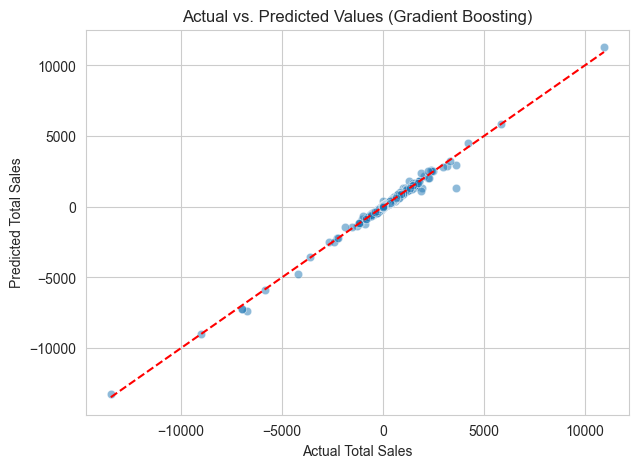

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='dashed')
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Actual vs. Predicted Values (Gradient Boosting)")
plt.show()
